In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
np.random.seed(0)

# ---- Data-generating process ----
n = 50
data = np.concatenate([
    np.random.normal(0, 1, int(0.9*n)),     # main bulk
    np.random.normal(0, 25, int(0.1*n))     # few outliers
])

theta_grid = np.linspace(-3, 3, 1000) # parameter grid
eta = 1.0                             # temperature

# ---- Prior ----
prior = np.exp(-0.5 * (theta_grid / 10)**2)
prior /= prior.sum()

def squared_loss(theta, y):
    return 0.5 * (y - theta)**2

def huber_loss(theta, y, c=1.5):
    r = y - theta
    return np.where(np.abs(r) <= c, 0.5 * r**2, c*np.abs(r) - 0.5*c)

In [ ]:
# ---- Compute posteriors ----
log_post_bayes = np.log(prior)
log_post_huber = np.log(prior)

for y in data:
    log_post_bayes -= eta * squared_loss(theta_grid, y)
    log_post_huber -= eta * huber_loss(theta_grid, y)

post_bayes = np.exp(log_post_bayes - log_post_bayes.max()) # subtract max to avoid overflow (cancels with normalization)
post_bayes /= post_bayes.sum()

post_huber = np.exp(log_post_huber - log_post_huber.max())
post_huber /= post_huber.sum()

mean_bayes = np.sum(theta_grid * post_bayes)
mean_huber = np.sum(theta_grid * post_huber)

True mean = 0
Bayes posterior mean: -1.174414212972845
Huber posterior mean : 0.1628097209839107


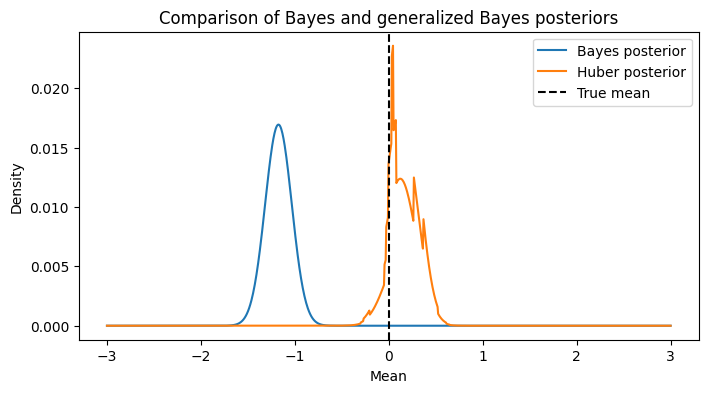

In [30]:
print("True mean = 0")
print("Bayes posterior mean:", mean_bayes)
print("Huber posterior mean :", mean_huber)

plt.figure(figsize=(8,4))
plt.plot(theta_grid, post_bayes, label="Bayes posterior")
plt.plot(theta_grid, post_huber, label="Huber posterior")
plt.axvline(0, color="k", linestyle="--", label="True mean")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Mean")
plt.title("Comparison of Bayes and generalized Bayes posteriors")
plt.show()